In [91]:
import psycopg2

In [92]:
pylab inline

SyntaxError: invalid syntax (<ipython-input-92-b794e5809f34>, line 1)

In [97]:
conn = psycopg2.connect("dbname=db_user_development user=pgdev-admin")

In [5]:
plt.xkcd()

In [98]:
cur = conn.cursor()
cur.execute("""SELECT COUNT(*), date_trunc('week', created_at) FROM task_requests
            WHERE task_requests.request_source = 'website' 
                AND task_requests.state = 'completed' 
                AND (task_requests.enable = true) 
            GROUP BY date_trunc('week', created_at) 
            ORDER BY 2""")
data = cur.fetchall()
bookings, weeks = zip(*data)

cur.close();

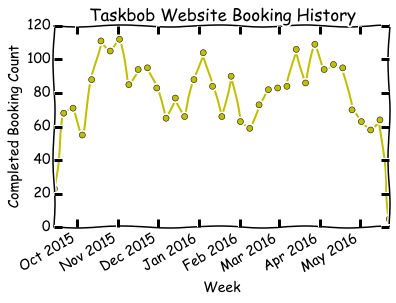

In [99]:
fig = plt.figure()

plt.plot(weeks, bookings, 'yo-')
plt.title('Taskbob Website Booking History')
plt.ylabel('Completed Booking Count')

plt.xlabel('Week')

fig.autofmt_xdate()

plt.show()

In [110]:
cur = conn.cursor()
cur.execute("""SELECT COUNT(*), date_trunc('week', to_ist(created_at)) FROM task_requests
            WHERE task_requests.request_source = 'website' AND (task_requests.enable = true) 
            GROUP BY 2 
            ORDER BY 2 desc""")
data = cur.fetchall()
all_bookings, all_weeks = zip(*data)

cur.close();

In [111]:
data

[(32, datetime.datetime(2016, 5, 23, 0, 0)),
 (103, datetime.datetime(2016, 5, 16, 0, 0)),
 (91, datetime.datetime(2016, 5, 9, 0, 0)),
 (82, datetime.datetime(2016, 5, 2, 0, 0)),
 (115, datetime.datetime(2016, 4, 25, 0, 0)),
 (185, datetime.datetime(2016, 4, 18, 0, 0)),
 (176, datetime.datetime(2016, 4, 11, 0, 0)),
 (177, datetime.datetime(2016, 4, 4, 0, 0)),
 (173, datetime.datetime(2016, 3, 28, 0, 0)),
 (154, datetime.datetime(2016, 3, 21, 0, 0)),
 (170, datetime.datetime(2016, 3, 14, 0, 0)),
 (156, datetime.datetime(2016, 3, 7, 0, 0)),
 (141, datetime.datetime(2016, 2, 29, 0, 0)),
 (221, datetime.datetime(2016, 2, 22, 0, 0)),
 (146, datetime.datetime(2016, 2, 15, 0, 0)),
 (129, datetime.datetime(2016, 2, 8, 0, 0)),
 (112, datetime.datetime(2016, 2, 1, 0, 0)),
 (170, datetime.datetime(2016, 1, 25, 0, 0)),
 (141, datetime.datetime(2016, 1, 18, 0, 0)),
 (136, datetime.datetime(2016, 1, 11, 0, 0)),
 (169, datetime.datetime(2016, 1, 4, 0, 0)),
 (136, datetime.datetime(2015, 12, 28, 0, 0)

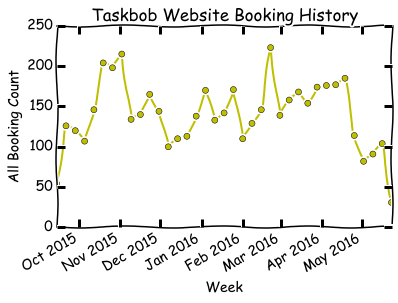

In [101]:
fig = plt.figure()

plt.plot(all_weeks, all_bookings, 'yo-')
plt.title('Taskbob Website Booking History')
plt.ylabel('All Booking Count')

plt.xlabel('Week')

fig.autofmt_xdate()

plt.show()

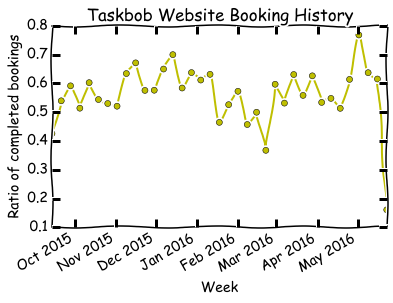

In [102]:
fig = plt.figure()

ratio = []
for i in range(0, len(bookings)):
    ratio.append(bookings[i] / all_bookings[i])

plt.plot(all_weeks, ratio, 'yo-')
plt.title('Taskbob Website Booking History')
plt.ylabel('Ratio of completed bookings')

plt.xlabel('Week')

fig.autofmt_xdate()

plt.show()

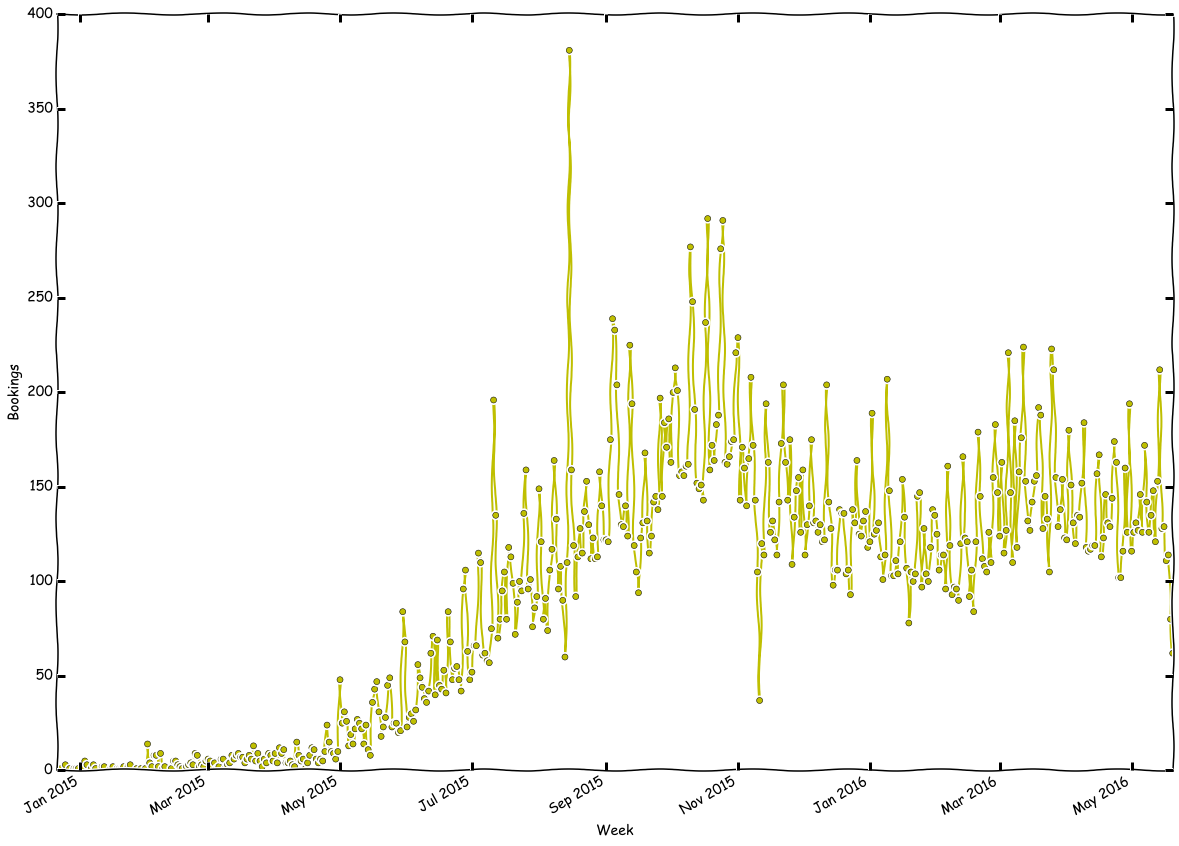

In [86]:
cur = conn.cursor()
cur.execute("""SELECT COUNT(*), date_trunc('day', created_at) FROM task_requests
            WHERE state = 'completed' AND request_source = 'web AND (task_requests.enable = true) 
            GROUP BY date_trunc('day', created_at) 
            ORDER BY 2""")

data = cur.fetchall()
app_bookings, app_weeks = zip(*data)

cur.close();

fig = plt.figure(figsize=(20,15))

plt.plot(app_weeks, app_bookings, 'yo-')

plt.ylabel('Bookings')

plt.xlabel('Week')

fig.autofmt_xdate()

plt.show()

In [96]:
conn.close()